In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.linear_model import Ridge, RidgeCV

import xgboost as xgb
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

Here I am importing everything that i need.

In [27]:
df = pd.read_csv('inequality_class_final.csv')
df2=df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          205 non-null    object 
 1   federalism_GT                    202 non-null    float64
 2   id                               69 non-null     float64
 3   region_wb                        69 non-null     object 
 4   gdp                              69 non-null     float64
 5   statehiste1500_02n               159 non-null    float64
 6   origtime2                        158 non-null    float64
 7   eleva                            193 non-null    float64
 8   avg_temp                         197 non-null    float64
 9   Maddison_gdppc_1990_estimate_ln  194 non-null    float64
 10  lp_lat_abst_fill                 200 non-null    float64
 11  mountains                        196 non-null    float64
 12  log_ocdistance_new    

Im going to go ahead and drop variables that are not needed - name and region are not quantitative and we dont necessarily want to use each country to map to its respective income inequality


 
Country name, regional dummy, id


may drop gdp bc there are so few entries for it
when gdp is not dropped then there are 52 non null entries
when gdp is dropped then there are 122 entries 

this is a 142% increase in the number of entries.

**I will drop gdp and see how it goes.** 

### After dropping gdp my models do well and there still is gdp from 1990 so I will drop gdp in my final model

In [28]:
df = df.drop(columns=['country','region_wb','id','gdp'])
df.head()

,federalism_GT,statehiste1500_02n,origtime2,eleva,avg_temp,Maddison_gdppc_1990_estimate_ln,lp_lat_abst_fill,mountains,log_ocdistance_new,rugged,...,sd_emeanclip,Urbanpopulationoftotalpop,dist2suitable_km_new,Ygini_disp,Fixedtelephonesubscriptionsp,Employmentinagricultureof,Accesstoelectricityofpopu,pln_sxHr_mean,agyears_ext,popd_1500AD
0,2.0,0.311557,15000.0,1076.740352,21.6,9.079312,0.255556,0.455154,2.952231,1.732390,...,0.776437,76.920,191207.98,46.400002,18.318046,13.790000,98.110626,2626.828031,4100.0,12.078997
1,0.0,NaN,NaN,184.250987,26.0,8.904918,0.044444,0.048973,4.338826,0.306818,...,0.133851,66.547,175987.63,45.799999,16.041285,8.460000,94.783394,6696.253076,1500.0,0.057579
2,0.0,0.124440,8000.0,359.346328,3.6,10.248469,0.688889,0.190206,4.567989,0.715470,...,0.248912,84.588,108188.94,25.000000,60.024409,2.250000,100.000000,0.000000,5500.0,0.842480
3,2.0,0.358282,45000.0,1317.581088,7.0,10.436217,0.522222,0.938316,5.708037,4.761175,...,0.625552,73.530,358067.16,29.900000,65.373435,4.000000,100.000000,877.940256,5500.0,19.928775
4,0.0,0.082024,135000.0,208.329245,27.6,7.401412,0.088889,0.016055,4.321187,0.227549,...,0.074167,48.669,351368.59,43.000000,1.639566,53.939999,56.975372,6889.873359,3500.0,7.670432


drop empty cells, check how much data is left

### I still get 122 rows of data which is pretty good


In [29]:
df=df.dropna()
df2=df2.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 204
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   federalism_GT                    122 non-null    float64
 1   statehiste1500_02n               122 non-null    float64
 2   origtime2                        122 non-null    float64
 3   eleva                            122 non-null    float64
 4   avg_temp                         122 non-null    float64
 5   Maddison_gdppc_1990_estimate_ln  122 non-null    float64
 6   lp_lat_abst_fill                 122 non-null    float64
 7   mountains                        122 non-null    float64
 8   log_ocdistance_new               122 non-null    float64
 9   rugged                           122 non-null    float64
 10  tropical                         122 non-null    float64
 11  pmean                            122 non-null    float64
 12  irri_impact5          

In [30]:
vars = ['federalism_GT',
 'statehiste1500_02n',
 'origtime2',
 'eleva',
 'avg_temp',
 'Maddison_gdppc_1990_estimate_ln',
 'lp_lat_abst_fill',
 'mountains',
 'log_ocdistance_new',
 'rugged',
 'tropical',
 'pmean',
 'irri_impact5',
 'frstdays',
 'sd_emeanclip',
 'Urbanpopulationoftotalpop',
 'dist2suitable_km_new',
 'Fixedtelephonesubscriptionsp',
 'Employmentinagricultureof',
 'Accesstoelectricityofpopu',
 'pln_sxHr_mean',
 'agyears_ext',
 'popd_1500AD']




### Here I am assigning my IVs and y values  


(array([14., 12., 17., 22., 23., 20.,  6.,  4.,  2.,  2.]),
 array([23.5, 27.8, 32.1, 36.4, 40.7, 45. , 49.3, 53.6, 57.9, 62.2, 66.5]),
 <BarContainer object of 10 artists>)

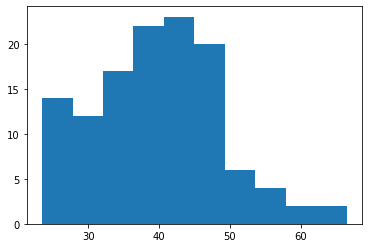

In [31]:

y = df.loc[:, 'Ygini_disp'].values


plt.hist(y) 

# Y var is somewhat gaussian but still skewed

looks good enough to use

In [32]:
def numPCA(x,v):
    pca = PCA(.80)
    model = pca.fit(StandardScaler().fit_transform(x[v]))
    n_pcs = pca.n_components_
        
    most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
    #print(model.components_)
    initial_feature_names = v
    # get the names
    most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

    
    dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

    # build the dataframe
    df2 = pd.DataFrame(dic.items())
    print (n_pcs)
    print (pca.explained_variance_ratio_)
    
    return  df2 , model



# Time for PCA (yay!)
---
### Im going to try to group elevation, latitude, tropical, rugged, temperature, agricultural history, length of time using advanced 
### agriculture, and plantation crop suitability and precipitation together as they seem to deal with agricultural conditions

I ended up condensing all these variables into 3 pca variables. My linear regression model ended up using only PC2, which strange but im just glad that its using part of my PCA.

In [33]:

a,b = numPCA(df,vars)
a
# i just ran pca on everything bc im just curious, ik ur not supposed to do it like

6
[0.35194906 0.1761922  0.1129949  0.07162949 0.06046289 0.05405266]


,0,1
0,PC0,lp_lat_abst_fill
1,PC1,eleva
2,PC2,pmean
3,PC3,statehiste1500_02n
4,PC4,federalism_GT
5,PC5,popd_1500AD


In [34]:
pca_vars = ['lp_lat_abst_fill','eleva','avg_temp','pmean','statehiste1500_02n','tropical','rugged','agyears_ext','pln_sxHr_mean']

table, model = numPCA(df,pca_vars) #running pca on farming like variables
table
#table is buggy 

3
[0.48900626 0.18368121 0.13847285]


,0,1
0,PC0,tropical
1,PC1,eleva
2,PC2,statehiste1500_02n


## 3 pca variables replace 9 Ivs and account for %80 of the variance

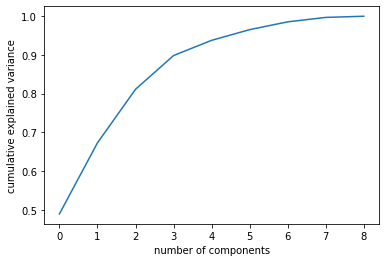

In [35]:
#scree plot for pca using df[pca_vars]
pca = PCA().fit(StandardScaler().fit_transform(df[pca_vars]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
#3 components explain 80% of the variance but i think the graph is wrong as in 2 =3 and 3=4 on the number of components

I used a scree plot before and was just curious about how it would look. 

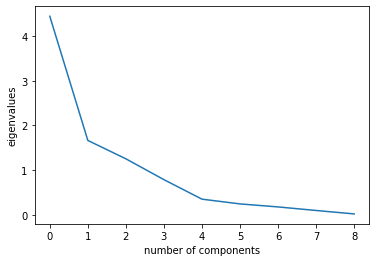

In [36]:
pca = PCA().fit(StandardScaler().fit_transform(df[pca_vars]))
plt.plot(pca.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('eigenvalues');

Im not exactly sure what to do based on the grpah, but ive read that Kaiser rule says pick enough components for an eigenvalue of 1 and also to look at he elbows of the line  to pick how many components. Im just going to go with 3 components becuase that explains %80 fo the variance.

### Based on this: [0.48900626 0.18368121 0.13847285]



**I decided to use the first three components to explain  9 variables related to argiculture / landscape**

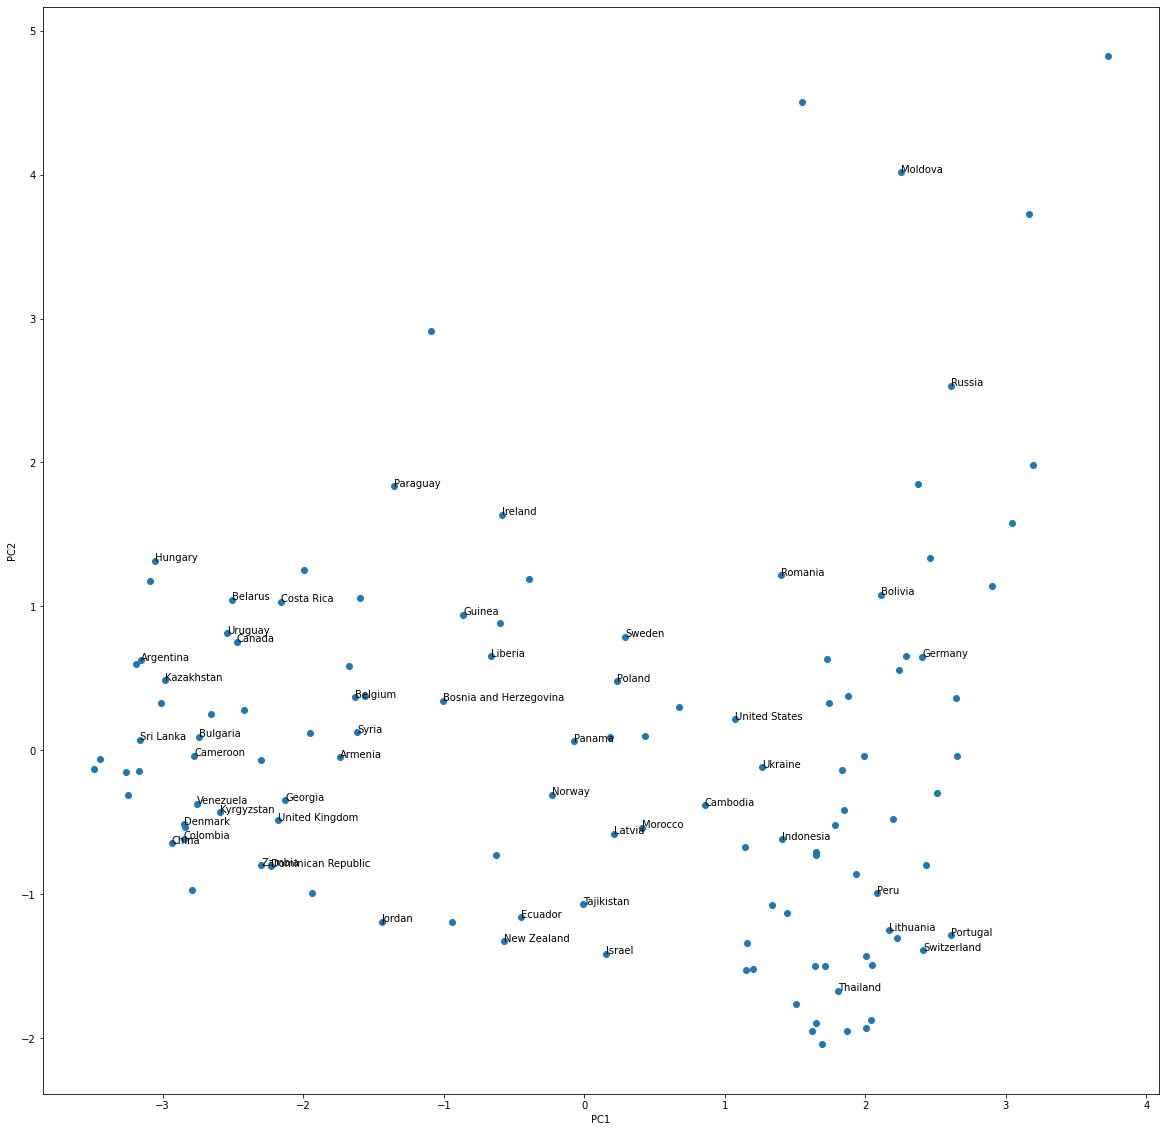

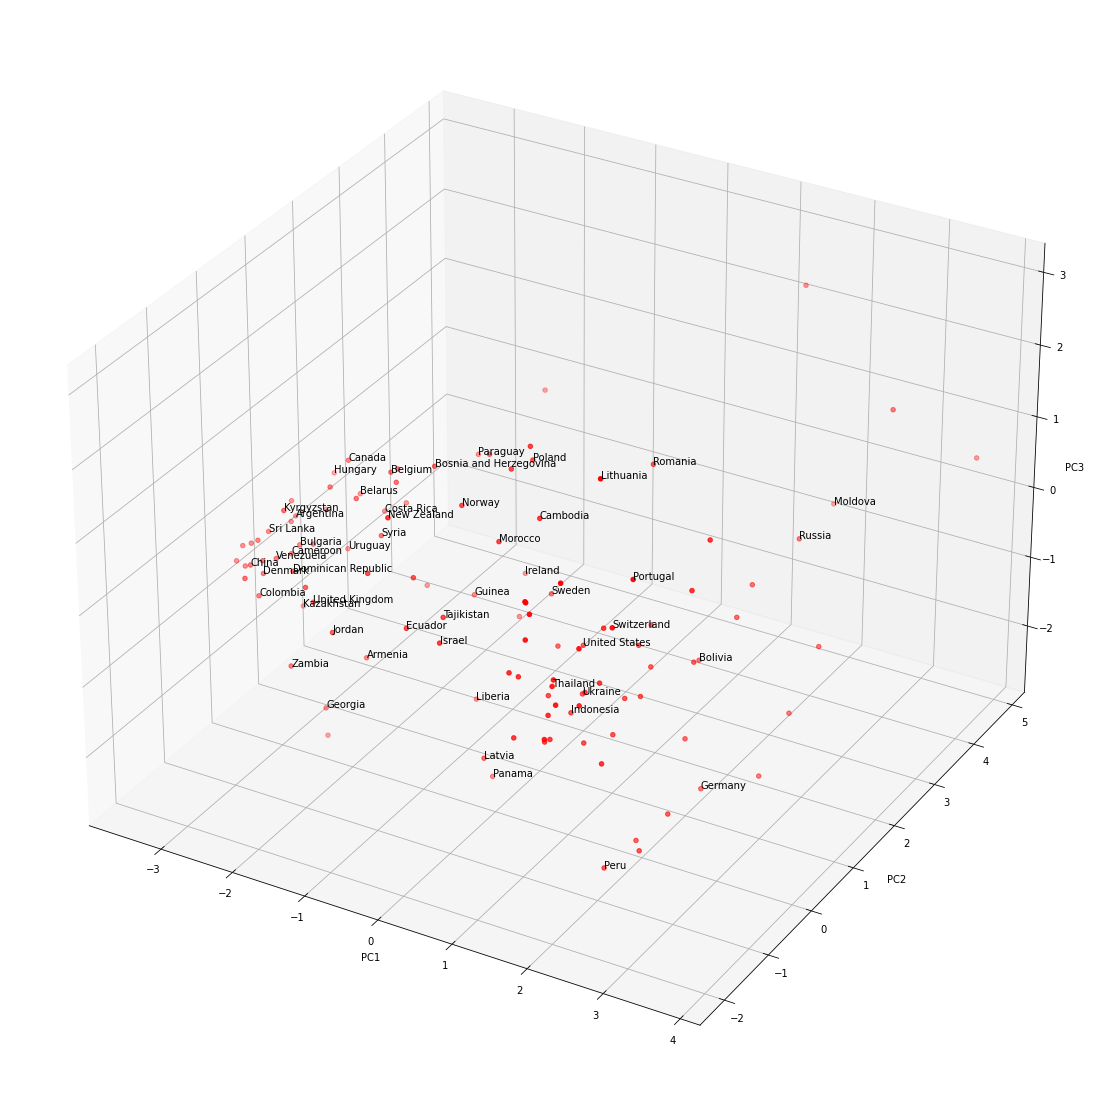

In [59]:
#pca biplot for df[pca_vars]
pca = PCA().fit(StandardScaler().fit_transform(df[pca_vars]))
pca_data = pca.transform(StandardScaler().fit_transform(df[pca_vars]))
xs = pca_data[:,0]
ys = pca_data[:,1]
f = plt.figure()
plt.scatter(xs,ys)
plt.xlabel("PC1")
plt.ylabel("PC2")

for i, txt in enumerate(df2['country']):
    plt.annotate(txt, (xs[i], ys[i]))

f.set_figheight(20)
f.set_figwidth(20)
    
plt.show()

#3d biplot for df[pca_vars]
pca = PCA().fit(StandardScaler().fit_transform(df[pca_vars]))
pca_data = pca.transform(StandardScaler().fit_transform(df[pca_vars]))
xs = pca_data[:,0]
ys = pca_data[:,1]
zs = pca_data[:,2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, c='r', marker='o')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

for i, txt in enumerate(df2['country']):
    ax.text(xs[i], ys[i], zs[i], txt)



fig.set_figwidth(20)
fig.set_figheight(20)


plt.show()

I was just curious about how this would look.

---
# Moving on from PCA
---


In [38]:
#define new variables after pca


#remove pca_vars from vars
for i in pca_vars:
    vars.remove(i)


vars.append('PC0')
vars.append('PC1')
vars.append('PC2')


pca2 = PCA(n_components=3) #using 3 component bc that explains %80 of the variance

latent_vars = pca2.fit(StandardScaler().fit_transform(df[pca_vars]))
print ("Variance explained by each latent variable in PCA: ", pca2.explained_variance_ratio_)
df['PC0'] = latent_vars.transform(StandardScaler().fit_transform(df[pca_vars]))[:,0]
df['PC1'] = latent_vars.transform(StandardScaler().fit_transform(df[pca_vars]))[:,1]
df['PC2'] = latent_vars.transform(StandardScaler().fit_transform(df[pca_vars]))[:,2]

Variance explained by each latent variable in PCA:  [0.48900626 0.18368121 0.13847285]


In [39]:
#train test split
dfx = df[vars]


x_train, x_test, y_train, y_test = train_test_split(dfx, y, test_size=0.25, random_state=42)


# make sure results make sense
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)



(91, 17) (91,)
(31, 17) (31,)


The shape of the training and testing data looks good.

---
## Naive model
---
My naive model predicted y = . 39.7 which is the mean of y.
I just want to compare my models to a baseline model

This would mean that the naive model would have an RMSE of 8.8 and MSE of 77.538

In [67]:
print ("standard deviation of y " + str(np.std(y)))
print ("mean of y " + str(np.mean(y)))
print ("sample variance " + str(np.var(y)))

standard deviation of y 8.805587095565123
mean of y 39.718032778688524
sample variance 77.53836409758301


---
## Linear model
---

In [40]:
def lin (x_train, x_test, y_train, y_test,df,df2,vars):
    # try both linear and polynomial of different degrees
    linear_model = LinearRegression(normalize=True)
    lin_1 = linear_model.fit(x_train, y_train)
    lin1_predict = lin_1.predict(x_test)
    print('cross val for test set')
    lin_score=np.mean(cross_val_score(linear_model, df,df2, cv=3))
    print("lin score", lin_score)
    print('MSE for test set')
    print('MSE: lin ', mean_squared_error(lin1_predict, y_test))
    
    coefs = lin_1.coef_[lin_1.coef_ > .0001]
    equation_dict = {}
    print(f'Equation:')
    for i in range(len(coefs[:-1])):
        print(f'{round(coefs[i], 3)} {vars[i]}', end=' + ')
        equation_dict[coefs[i]] = vars[i]
    print(f'{round(coefs[-1], 2)}{vars[-1]}')
    equation_dict[coefs[-1]] = vars[-1]
   
        
     
lin(x_train, x_test, y_train, y_test,dfx,y,vars)       


cross val for test set
lin score 0.5234820488969513
MSE for test set
MSE: lin  36.80981061034037
Equation:
0.747 federalism_GT + 2.686 origtime2 + 3.467 Maddison_gdppc_1990_estimate_ln + 0.046 mountains + 0.036 log_ocdistance_new + 2.097 irri_impact5 + 3.18PC2


 The linear model seems to do slightly better than lasso, but they are close to each other. 

 

 

---
## Lasso regression with a linear model
---

cross val for test set
lasso score 0.5778750544730055
MSE for test set
MSE: lasso  40.46635484280526
R squared for test set
R squared: lasso  -0.28215908468965845
Lasso alpha:  0.07359814475265763
Lasso coefficients:  [ 0.          0.         -0.         -0.         -0.          0.
 -0.35687746  1.211673   -0.          0.         -0.11648233 -0.
 -0.         -0.0512826  -0.          0.65366216  1.56167731]


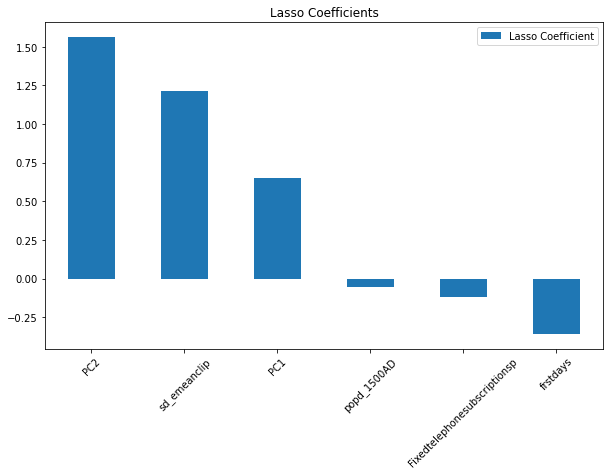

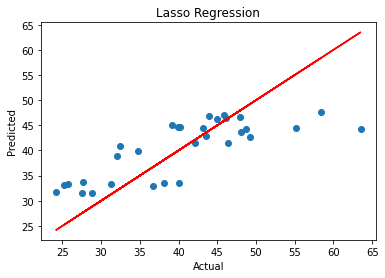

In [41]:
#code lasso regression for xtrain y train / test
lasso_model = LassoCV(alphas = np.logspace(-4, 4, 1000), cv=3, normalize=True)
lasso_model.fit(x_train, y_train)
lasso_predict = lasso_model.predict(x_test)
print('cross val for test set')
lasso_score=np.mean(cross_val_score(lasso_model, dfx,y, cv=3))
print("lasso score", lasso_score)
print('MSE for test set')
print('MSE: lasso ', mean_squared_error(lasso_predict, y_test))
print('R squared for test set')
print('R squared: lasso ', r2_score(lasso_predict, y_test))
print('Lasso alpha: ', lasso_model.alpha_)
print('Lasso coefficients: ', lasso_model.coef_)

#plot lasso coefficients
lasso_coef = pd.DataFrame(lasso_model.coef_, x_train.columns, columns=['Lasso Coefficient'])
lasso_coef = lasso_coef[lasso_coef['Lasso Coefficient']!=0]
lasso_coef.sort_values(by='Lasso Coefficient', ascending=False, inplace=True)
lasso_coef.plot(kind='bar', figsize=(10, 6), rot=45)
plt.title('Lasso Coefficients')
plt.show()

#plot regression line
plt.scatter(y_test, lasso_predict)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression')
plt.show()

---
## Polynomial regression with lasso
---

In [42]:
#polynomial regression for xtrain y train / test
polynomial_model = make_pipeline(PolynomialFeatures(2), LassoCV(alphas = np.logspace(-4, 4, 1000), cv=3, normalize=True))
polynomial_model.fit(x_train, y_train)
polynomial_predict = polynomial_model.predict(x_test)
print('cross val for test set')
poly_score=np.mean(cross_val_score(polynomial_model, dfx,y, cv=3))
print("poly score", poly_score)
print('MSE for test set')
print('MSE: polynomial ', mean_squared_error(polynomial_predict, y_test))
print('R squared for test set')
print('R squared: polynomial ', r2_score(polynomial_predict, y_test))
print('Polynomial alpha: ', polynomial_model.steps[1][1].alpha_)
print('Polynomial coefficients: ', polynomial_model.steps[1][1].coef_)




cross val for test set
poly score 0.5330521875666
MSE for test set
MSE: polynomial  37.22134476823167
R squared for test set
R squared: polynomial  -0.07196180868904678
Polynomial alpha:  0.09353431520292387
Polynomial coefficients:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.90716631e-03  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  1.14217439e-05
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0

Running a 3 degree model did worse and 4 degree did even more worse

---
## Random Forest
---

cross val for test set
rf score 0.6280548804870646
MSE for test set
MSE: random forest  25.332068858450167
R squared for test set
R squared: random forest  0.5333902252348834
Random forest feature importances:  [0.00477339 0.02292487 0.03952247 0.00842134 0.01712207 0.02172253
 0.0195623  0.01881294 0.01559841 0.01401674 0.03499392 0.03055295
 0.43627117 0.04195874 0.10039454 0.01856008 0.15479154]


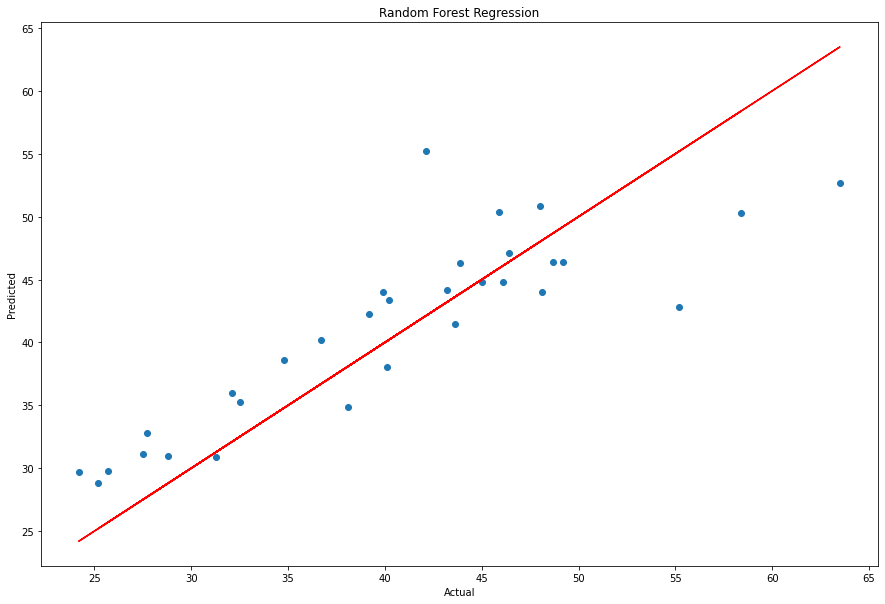

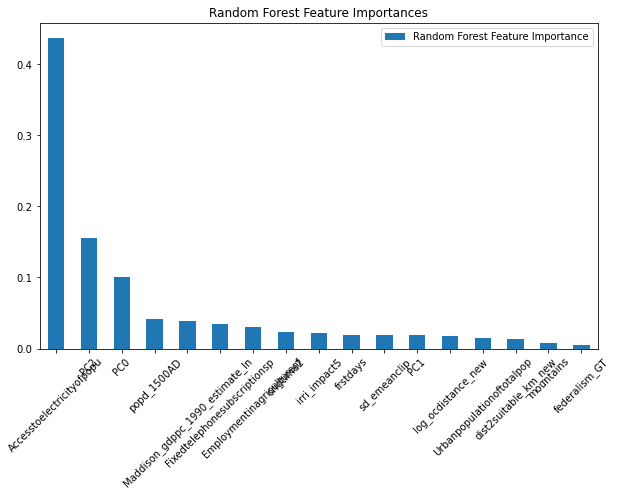

In [43]:
#code random forest regression for xtrain y train / test
random_forest_model = RandomForestRegressor()
random_forest_model.fit(x_train, y_train)
random_forest_predict = random_forest_model.predict(x_test)
print('cross val for test set')
rf_score=np.mean(cross_val_score(random_forest_model, dfx,y, cv=3))
print("rf score", rf_score)
print('MSE for test set')
print('MSE: random forest ', mean_squared_error(random_forest_predict, y_test))
print('R squared for test set')
print('R squared: random forest ', r2_score(random_forest_predict, y_test))
print('Random forest feature importances: ', random_forest_model.feature_importances_)

#plot tree
plt.figure(figsize=(15, 10))
plt.title('Random Forest Regression')
plt.scatter(y_test, random_forest_predict)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

#plot tree features
random_forest_features = pd.DataFrame(random_forest_model.feature_importances_, x_train.columns, columns=['Random Forest Feature Importance'])
random_forest_features = random_forest_features[random_forest_features['Random Forest Feature Importance']!=0]
random_forest_features.sort_values(by='Random Forest Feature Importance', ascending=False, inplace=True)
random_forest_features.plot(kind='bar', figsize=(10, 6), rot=45)
plt.title('Random Forest Feature Importances')
plt.show()


---
## Xgboost (just curious)
---

In [44]:

#code xgboost regression for xtrain y train / test
xgboost_model = XGBRegressor()
xgboost_model.fit(x_train, y_train)
xgboost_predict = xgboost_model.predict(x_test)
print('cross val for test set')
xgb_score=np.mean(cross_val_score(xgboost_model, dfx,y, cv=3))
print("xgb score", xgb_score)
print('MSE for test set')
print('MSE: xgboost ', mean_squared_error(xgboost_predict, y_test))
print('R squared for test set')
print('R squared: xgboost ', r2_score(xgboost_predict, y_test))
print('Xgboost feature importances: ', xgboost_model.feature_importances_)

cross val for test set
xgb score 0.6276119913961716
MSE for test set
MSE: xgboost  37.62926533981573
R squared for test set
R squared: xgboost  0.23887303127441073
Xgboost feature importances:  [0.00237171 0.00478629 0.01196553 0.00741962 0.0097345  0.01873788
 0.02807695 0.00705368 0.0087214  0.00400049 0.00755274 0.09425601
 0.6367649  0.03052084 0.08218332 0.01505475 0.03079932]


---
## Polynomial regression with ridge (not needed but was curious how it looked...)
---

In [45]:
#ridge polynomial regression for xtrain y train / test
ridge_polynomial_model = make_pipeline(PolynomialFeatures(2), RidgeCV(alphas = np.logspace(-4, 4, 1000), cv=3, normalize=True))
ridge_polynomial_model.fit(x_train, y_train)
ridge_polynomial_predict = ridge_polynomial_model.predict(x_test)
print('cross val for test set')
ridge_poly_score=np.mean(cross_val_score(ridge_polynomial_model, dfx,y, cv=3))
print("ridge poly score", ridge_poly_score)
print('MSE for test set')
print('MSE: ridge polynomial ', mean_squared_error(ridge_polynomial_predict, y_test))
print('R squared for test set')
print('R squared: ridge polynomial ', r2_score(ridge_polynomial_predict, y_test))
print('Ridge polynomial alpha: ', ridge_polynomial_model.steps[1][1].alpha_)
print('Ridge polynomial coefficients: ', ridge_polynomial_model.steps[1][1].coef_)

cross val for test set
ridge poly score 0.5801535655966359
MSE for test set
MSE: ridge polynomial  38.211845860525024
R squared for test set
R squared: ridge polynomial  -0.0724171498264019
Ridge polynomial alpha:  2.8343433061513092
Ridge polynomial coefficients:  [ 0.00000000e+00  8.94820325e-02  5.82447008e-07 -5.03274446e-02
 -7.61732957e-02 -2.07996457e-02  4.45485475e-01 -2.43898198e-02
  3.31452923e-01 -2.19598428e-03  8.12325575e-08 -1.03375651e-02
 -2.10977495e-03 -1.91108562e-03 -1.10370396e-02 -8.77790084e-02
  1.21242415e-01  1.96025005e-01  1.17629696e-02  1.52952159e-06
  7.04218252e-03  1.19514504e-01  1.34290251e-02 -5.52722763e-01
  4.55188957e-03  2.63270505e-01 -2.65790233e-04  1.31956021e-07
  6.08924308e-04  7.67603461e-03  9.63899035e-04  4.56414366e-03
 -6.77837357e-03  6.52845380e-03 -9.49537647e-02  1.04864567e-11
  2.51351489e-07 -1.90054549e-06  3.46061842e-07  1.38224107e-05
  2.79128745e-08  3.52398564e-06  1.58304174e-08  2.98909068e-12
 -3.71572010e-08 -2